<a href="https://colab.research.google.com/github/Daanish-Hindustani/U.R.O.P-ML-Research-/blob/main/UropReseach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam


In [ ]:
df = pd.read_csv('/content/famineData.csv')

In [ ]:
df.describe()

,YEAR,\n \nAdjusted net national income per capita (current US$),\n\n\tAgricultural land (% of land area),\n \n \nAgricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),"Cause of death, by non-communicable diseases (% of total)",Cereal production (metric tons),...,Low-birthweight babies (% of births),"Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),\tPrevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population),phase_1_cat,phase_2_cat,phase_3_cat,phase_4_cat,phase_5_cat
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,2019.0,1201.205206,45.951483,4.227596,1.355434,62.778589,9.850943,23.337586,38.978875,4.617546e+06,...,13.703537,45.750000,59.411369,34.085714,25.100000,0.071429,0.428571,0.428571,0.071429,0.0
std,0.0,1026.749487,20.533917,4.196195,0.775337,35.646937,2.912403,16.337067,5.062847,7.715217e+06,...,3.070317,14.249575,13.495364,18.507913,7.945971,0.267261,0.513553,0.513553,0.267261,0.0
min,2019.0,393.023451,8.807332,0.055077,0.375227,0.551724,4.486702,4.359370,31.749440,3.510500e+04,...,9.776668,30.500000,35.678057,9.900000,11.600000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2019.0,462.178511,34.579129,1.317028,0.751316,33.036610,8.132596,12.615243,34.483949,3.745493e+05,...,10.530849,34.200000,52.520617,24.525000,19.550000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2019.0,978.405653,45.759486,2.228616,1.282089,76.745388,9.577772,19.330014,39.723300,2.571059e+06,...,14.257034,42.600000,59.218076,30.550000,23.450000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2019.0,1302.053572,60.323377,5.174212,1.752509,88.498264,11.547870,29.387641,43.203320,4.027939e+06,...,15.632451,51.925000,68.812006,37.475000,31.125000,0.000000,1.000000,1.000000,0.000000,0.0
max,2019.0,4030.654589,80.138340,12.487780,3.240454,95.892129,15.919731,58.083927,45.862340,2.967265e+07,...,18.818874,78.300000,84.839485,79.000000,39.400000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
df.head()

,Country,YEAR,Country\nPopulation,Phase 1,Phase 2,Phase 3,Phase 4,Phase 5,\n \nAdjusted net national income per capita (current US$),\n\n\tAgricultural land (% of land area),...,Low-birthweight babies (% of births),"Mortality rate, infant (per 1,000 live births)",People using at least basic drinking water services (% of population),\tPrevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population),phase_1_cat,phase_2_cat,phase_3_cat,phase_4_cat,phase_5_cat
0,Angola,2019,"31,825,000",23%,25%,22%,30%,0%,1327.803449,36.798749,...,15.541491,49.9,56.883037,26.9,18.0,0,0,0,1,0
1,NaN,2019,"1,133,522",39%,39%,17%,5%,0%,2664.962165,69.593023,...,10.255996,43.0,70.427535,18.3,11.6,0,0,1,0,0
2,Lesotho,2019,"2,293,000",44%,32%,19%,5%,0%,1054.949247,80.138340,...,14.514068,60.7,72.877375,29.0,23.5,0,0,1,0,0
3,Madagascar,2019,"26,969,000",43%,36%,17%,4%,0%,425.907807,70.290478,...,18.818874,45.3,51.172206,9.9,36.0,0,0,1,0,0
4,Malawi,2019,"18,771,580",75%,20%,5%,0%,0%,512.398439,62.876538,...,15.643135,32.9,69.464876,49.5,18.5,1,0,0,0,0


### CLEANING DATA


In [ ]:
df = df.drop(columns=['YEAR', 'Country'])
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
percentage_columns = ['Phase_1', 'Phase_2', 'Phase_3', 'Phase_4', 'Phase_5']
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '').astype(float) / 100

df = df.rename(columns={'Country\nPopulation': 'Population'})
df['Population'] = df['Population'].str.replace(',', '').astype(float)

In [ ]:
column_rename_dict = {
    'Population': 'Pop',
    'Phase_1': 'P1',
    'Phase_2': 'P2',
    'Phase_3': 'P3',
    'Phase_4': 'P4',
    'Phase_5': 'P5',
    'Adjusted_net_national_income_per_capita_(current_US$)': 'Income_per_capita',
    'Agricultural_land_(%_of_land_area)': 'Agri_land_area',
    'Agricultural_raw_materials_exports_(%_of_merchandise_exports)': 'Agri_exports',
    'Agricultural_raw_materials_imports_(%_of_merchandise_imports)': 'Agri_imports',
    'Annual_freshwater_withdrawals,_agriculture_(%_of_total_freshwater_withdrawal)': 'Water_withdrawals_agri',
    'Bank_capital_to_assets_ratio_(%)': 'Bank_capital_ratio',
    'Bank_liquid_reserves_to_bank_assets_ratio_(%)': 'Bank_liquid_reserves',
    'Cause_of_death,_by_non-communicable_diseases_(%_of_total)': 'Non_com_disease_deaths',
    'Cereal_production_(metric_tons)': 'Cereal_prod',
    'Exports_of_goods_and_services_(%_of_GDP)': 'Exports_GDP%',
    'GDP_per_capita_(current_US$)': 'GDP_per_capita',
    'GDP_per_capita_growth_(annual_%)': 'GDP_growth%',
    'Imports_of_goods_and_services_(%_of_GDP)': 'Imports_GDP%',
    'Imports_of_goods_and_services_(annual_%_growth)': 'Imports_growth%',
    'Incidence_of_malaria_(per_1,000_population_at_risk)': 'Malaria_incidence',
    'Incidence_of_tuberculosis_(per_100,000_people)': 'TB_incidence',
    'Inflation,_consumer_prices_(annual_%)': 'Inflation%',
    'Low-birthweight_babies_(%_of_births)': 'Low_birthweight%',
    'Mortality_rate,_infant_(per_1,000_live_births)': 'Infant_mortality',
    'People_using_at_least_basic_drinking_water_services_(%_of_population)': 'Water_services%',
    'Prevalence_of_severe_food_insecurity_in_the_population_(%)': 'Food_insecurity%',
    'Prevalence_of_undernourishment_(%_of_population)': 'Undernourishment%',
    'phase_1_cat': 'P1_cat',
    'phase_2_cat': 'P2_cat',
    'phase_3_cat': 'P3_cat',
    'phase_4_cat': 'P4_cat',
    'phase_5_cat': 'P5_cat',

}

# Rename the columns using the dictionary
df = df.rename(columns=column_rename_dict)

In [ ]:
df.head()

,Pop,P1,P2,P3,P4,P5,Income_per_capita,Agri_land_area,Agri_exports,Agri_imports,...,Low_birthweight%,Infant_mortality,Water_services%,Food_insecurity%,Undernourishment%,P1_cat,P2_cat,P3_cat,P4_cat,P5_cat
0,31825000.0,0.23,0.25,0.22,0.30,0.0,1327.803449,36.798749,0.055077,0.956585,...,15.541491,49.9,56.883037,26.9,18.0,0,0,0,1,0
1,1133522.0,0.39,0.39,0.17,0.05,0.0,2664.962165,69.593023,5.327677,1.298829,...,10.255996,43.0,70.427535,18.3,11.6,0,0,1,0,0
2,2293000.0,0.44,0.32,0.19,0.05,0.0,1054.949247,80.138340,4.592894,1.808670,...,14.514068,60.7,72.877375,29.0,23.5,0,0,1,0,0
3,26969000.0,0.43,0.36,0.17,0.04,0.0,425.907807,70.290478,2.248342,3.240454,...,18.818874,45.3,51.172206,9.9,36.0,0,0,1,0,0
4,18771580.0,0.75,0.20,0.05,0.00,0.0,512.398439,62.876538,1.199253,2.320119,...,15.643135,32.9,69.464876,49.5,18.5,1,0,0,0,0


In [ ]:
features = [
    'Pop', 'Income_per_capita', 'Agri_land_area', 'Agri_exports',
    'Agri_imports', 'Water_withdrawals_agri', 'Bank_capital_ratio',
    'Bank_liquid_reserves', 'Non_com_disease_deaths', 'Cereal_prod',
    'Exports_GDP%', 'GDP_per_capita', 'GDP_growth%', 'Imports_GDP%',
    'Imports_growth%', 'Malaria_incidence', 'TB_incidence', 'Inflation%',
    'Low_birthweight%', 'Infant_mortality', 'Water_services%',
    'Food_insecurity%', 'Undernourishment%'
]
targets = ['P3']

X = df[features]


In [ ]:
#Normilizing Data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X = X.values
y = df[targets].values

In [ ]:
print(X[0])

[0.27663568 0.25697493 0.39241583 0.         0.20290139 0.21222063
 0.47088239 0.51533017 0.         0.09721601 0.83082344 0.40643292
 0.28447106 0.         0.10885799 0.73462419 0.41050584 0.05731119
 0.63754606 0.40585774 0.43133369 0.24602026 0.23021583]


In [ ]:
print(y[0])

[0.22]


### Data Visualization

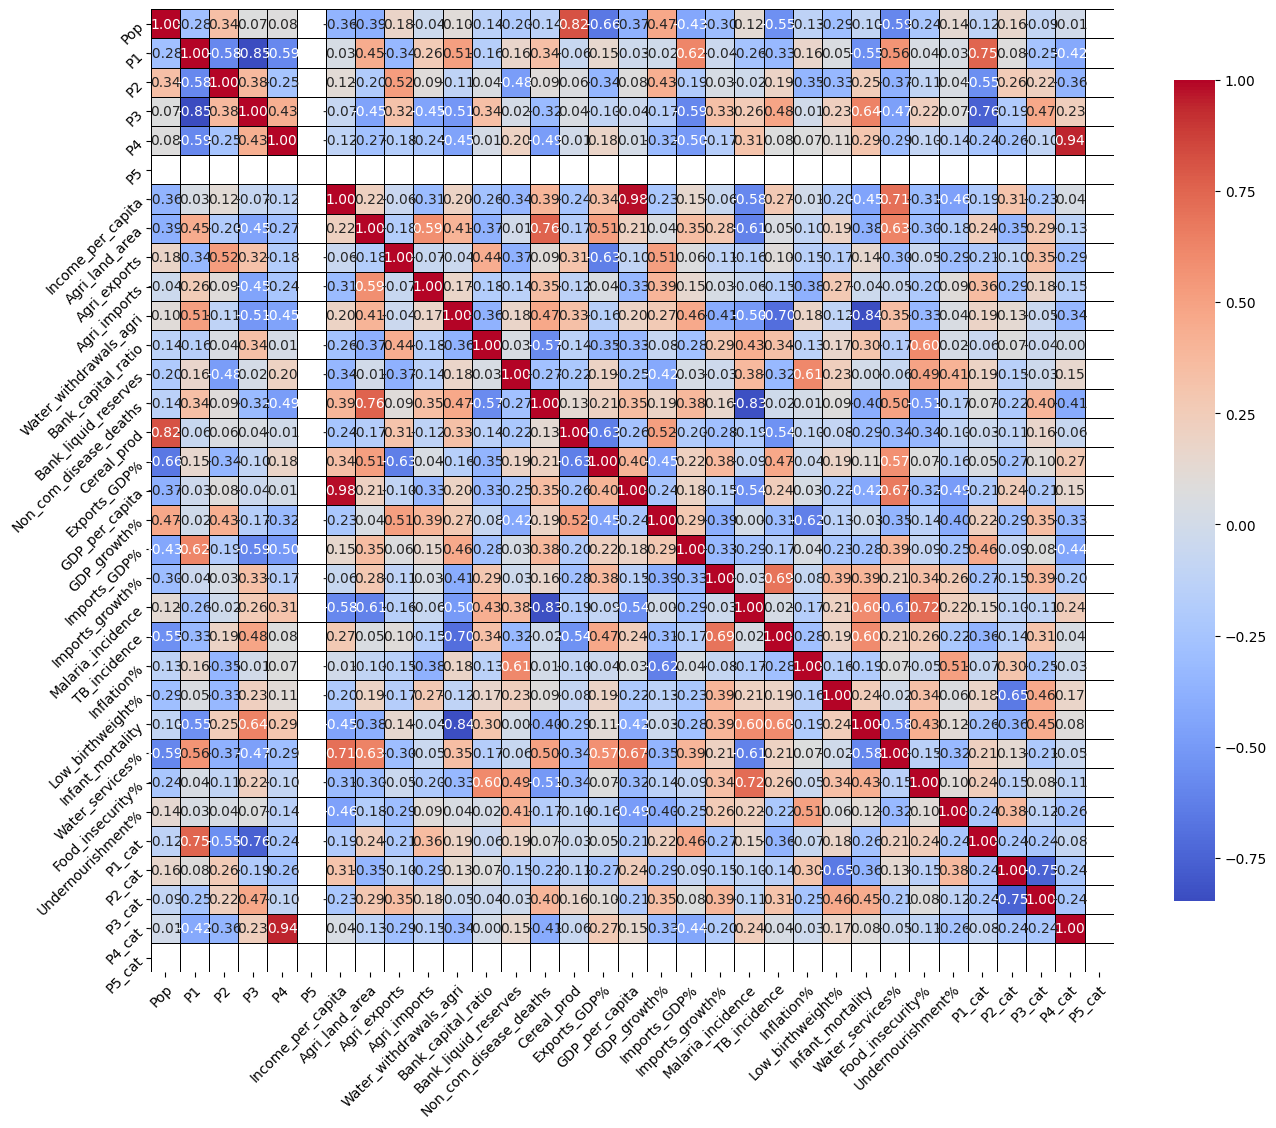

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8},
            square=True, linecolor='black')

plt.xticks(rotation=45, ha='right', fontsize=10, rotation_mode='anchor')
plt.yticks(rotation=45, ha='right', fontsize=10, rotation_mode='anchor')

plt.tight_layout(pad=2.0)

plt.show()

### Feed Forward Auto Encoder

In [ ]:
data = df.to_numpy()
data = data.astype('float32')

#Data split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data = df.to_numpy()
data = data.astype('float32')

#Data split
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# autoencoder architecture
input_dim = x_train.shape[1]  # Number of features
latent_dim = 4

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(input_dim, activation='relu')(input_layer)
encoded = layers.Dense(15, activation='relu')(encoded)
encoded = layers.Dense(13, activation='relu')(encoded)
encoded = layers.Dense(latent_dim, activation='relu',name='latent_space')(encoded)

# Decoder
decoded = layers.Dense(13, activation='relu')(encoded)
decoded = layers.Dense(15, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=15,
    shuffle=True,
    validation_data=(X_test, X_test)
)

encoder = models.Model(inputs=input_layer, outputs=encoded)

# Example usage: Encode test data
encoded_data = encoder.predict(X_test)

print("Encoded data shape:", encoded_data.shape)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1121 - val_loss: 0.1282
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - loss: 0.1119 - val_loss: 0.1281
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1117 - val_loss: 0.1280
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.1115 - val_loss: 0.1279
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1113 - val_loss: 0.1278
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1112 - val_loss: 0.1277
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1110 - val_loss: 0.1277
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1109 - val_loss: 0.1276
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1107 - val_loss: 0.1275
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1106 - val_loss: 0.1275
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1105 - val_loss: 0.1274
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.1103 - val_loss: 0.1273

In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('latent_space').output)
x_train_encoded = encoder.predict(x_train)
X_test_encoded = encoder.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [ ]:
print(len(x_train[0]))

23


In [ ]:
model = Sequential([
    Dense(23, input_dim=len(x_train[0]), activation='relu'),  # Input layer and hidden layers
    Dense(20, input_dim=len(x_train[0]), activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy', 'mean_absolute_error'])

# Display model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=12)

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_223 (Dense)                    │ (None, 23)                  │             552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_224 (Dense)                    │ (None, 20)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,545 (6.04 KB)

 Trainable params: 1,545 (6.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.0255 - mean_absolute_error: 0.1536
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0212 - mean_absolute_error: 0.1389
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0175 - mean_absolute_error: 0.1249
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0146 - mean_absolute_error: 0.1124
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0122 - mean_absolute_error: 0.1002
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0100 - mean_absolute_error: 0.0879
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0080 - mean_absolute_error: 0.0767
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 0.0064 - mean_absolute_error: 0.0694
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.000

In [ ]:
test_loss, test_accuracy, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Mean Absolute Error: {test_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0101 - mean_absolute_error: 0.0968
Test Loss: 0.010073329322040081
Test Accuracy: 0.0
Test Mean Absolute Error: 0.09678947925567627


In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

# Display predictions and true values for the first 5 test samples
for i in range(min(5, len(X_test))):  # Display the first 5 test samples or fewer if there are less than 5
    print(f"True: {y_test[i]}, Predicted: {y_pred[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
True: [0.27], Predicted: [0.13606074]
True: [0.21], Predicted: [0.13654026]
True: [0.22], Predicted: [0.13703057]
